<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
%matplotlib inline

Using TensorFlow backend.


In [2]:
import pandas as pd
datos= pd.read_csv("EnergyMolecule/roboBohr.csv")
datos.shape
datos.info()
datos.describe()
#print(datos)
...
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


In [5]:
def plotArrays(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()

In [6]:
numEpochs = 250
test_loss = np.zeros(numEpochs)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss = self.model.evaluate(x, y, verbose=0)
        test_loss[epoch-1] = loss
        print('\nTesting loss: {}'.format(loss))

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

### a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.


In [7]:
#Ajuste Training Set
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
#Ajuste Validation Set
scaler2 = StandardScaler().fit(df_val)
X_val_scaled = pd.DataFrame(scaler2.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
#Ajuste Validation Set
scaler3 = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler3.transform(df_test),columns=df_test.columns)
y_test_scaled = X_test_scaled.pop('Eat').values.reshape(-1,1)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
yTest = df_test.pop('Eat').values.reshape(-1, 1)

### **b) Para el mismo problema definido anteriormente (sección 1) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de gradients (link) en el backend de Keras. Deberá generar un histograma para todos los pesos de cada capa antes y despues del entrenamiento con 250 epochs. Comente**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session(
evaluated_gradientss = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


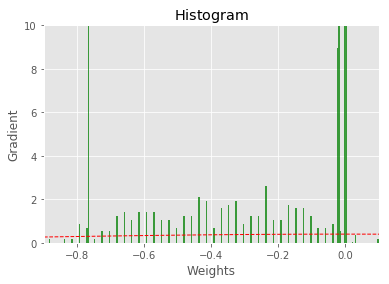

<Figure size 432x288 with 0 Axes>

In [116]:
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Weights')
plt.ylabel('Gradient')
plt.title(r'$\mathrm{Histogram}$')
plt.axis([-0.9, 0.1, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

In [16]:
model2 = Sequential()
model2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model2.compile(optimizer=sgd,loss='mean_squared_error')
history2 = model2.fit(X_train_scaled, 
                      y_train, epochs=250, 
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[TestCallback((X_test_scaled.values, yTest))])
#history2=pd.read_csv("history2b.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 10s 984us/step - loss: 1.5396 - val_loss: 1.0649

Testing loss: 1.1589300424582067
Epoch 2/250
9745/9745 [==============================] - 9s 884us/step - loss: 0.6249 - val_loss: 0.9646

Testing loss: 0.8967334562373739
Epoch 3/250
9745/9745 [==============================] - 8s 818us/step - loss: 0.5279 - val_loss: 1.0402

Testing loss: 0.7363576742074849
Epoch 4/250
9745/9745 [==============================] - 7s 756us/step - loss: 0.4586 - val_loss: 1.2199

Testing loss: 0.6162492386021475
Epoch 5/250
9745/9745 [==============================] - 7s 765us/step - loss: 0.3976 - val_loss: 0.7062

Testing loss: 0.8307623757683061
Epoch 6/250
9745/9745 [==============================] - 8s 832us/step - loss: 0.3480 - val_loss: 1.4434

Testing loss: 0.47401583314883594
Epoch 7/250
9745/9745 [==============================] - 8s 854us/step - loss: 0.3058 - val_loss: 1.0511

Testing lo

KeyboardInterrupt: 

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


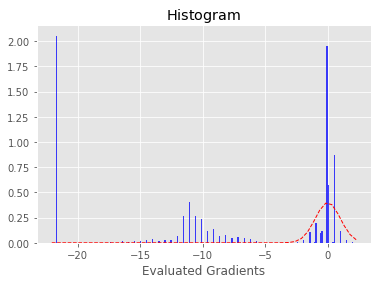

<Figure size 432x288 with 0 Axes>

In [128]:
#history2=pd.read_csv("history2b.csv")
loss = keras.losses.mean_squared_error(model2.output,y_train_scaled)
listOfVariableTensors = model2.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients2 = sess.run(gradients,feed_dict={model2.input:X_train_scaled.values})
evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradients2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.9, 0.1, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

### c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


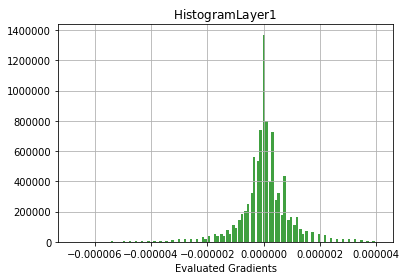

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


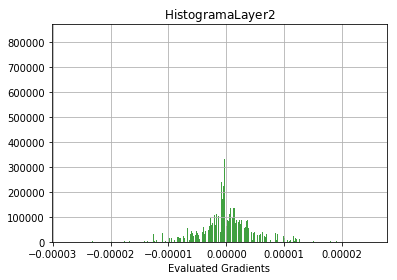

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


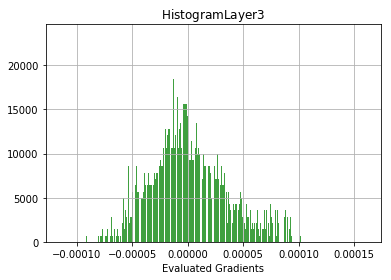

<Figure size 432x288 with 0 Axes>

In [9]:
modelc2 = Sequential()
modelc2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc2.compile(optimizer=sgd,loss='mean_squared_error')
loss = keras.losses.mean_squared_error(modelc2.output,y_train_scaled)
#historyc=pd.read_csv("history2c.csv")
gradients = K.gradients(loss, modelc2.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modelc2.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modelc2.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelc2.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modelc2.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modelc2.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histograma Layer 2}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()

In [12]:
modelc = Sequential()
modelc.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc.compile(optimizer=sgd,loss='mean_squared_error')
historyc = modelc.fit(X_train_scaled, y_train, 
                      epochs=250, verbose=1,
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[TestCallback((X_test_scaled.values, yTest))])
result= pd.DataFrame(historyc.history)
result.to_csv("history2c.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 788us/step - loss: 14.7899 - val_loss: 15.8671

Testing loss: 10.395253303944209
Epoch 2/250
9745/9745 [==============================] - 7s 717us/step - loss: 14.2264 - val_loss: 15.1800

Testing loss: 10.425909299463045
Epoch 3/250
9745/9745 [==============================] - 7s 709us/step - loss: 14.0549 - val_loss: 14.5693

Testing loss: 10.619195009089905
Epoch 4/250
9745/9745 [==============================] - 7s 700us/step - loss: 14.0806 - val_loss: 14.3233

Testing loss: 14.91383041237826
Epoch 5/250
9745/9745 [==============================] - 7s 757us/step - loss: 13.9151 - val_loss: 14.1575

Testing loss: 10.827418237716682
Epoch 6/250
9745/9745 [==============================] - 7s 713us/step - loss: 13.6085 - val_loss: 14.2747

Testing loss: 9.323345880113179
Epoch 7/250
9745/9745 [==============================] - 7s 708us/step - loss: 4.3400 - val_loss: 3.2802

Te

9745/9745 [==============================] - 5s 491us/step - loss: 0.0449 - val_loss: 0.6760

Testing loss: 0.6510220724733139
Epoch 118/250
9745/9745 [==============================] - 6s 616us/step - loss: 0.0424 - val_loss: 1.1483

Testing loss: 0.42429452053789823
Epoch 119/250
9745/9745 [==============================] - 5s 557us/step - loss: 0.0430 - val_loss: 0.4727

Testing loss: 0.7274488274758597
Epoch 120/250
9745/9745 [==============================] - 5s 479us/step - loss: 0.0443 - val_loss: 0.6499

Testing loss: 0.6831064289424279
Epoch 121/250
9745/9745 [==============================] - 5s 510us/step - loss: 0.0388 - val_loss: 0.7324

Testing loss: 0.6474691931224036
Epoch 122/250
9745/9745 [==============================] - 7s 729us/step - loss: 0.0391 - val_loss: 0.6185

Testing loss: 0.6764176504921121
Epoch 123/250
9745/9745 [==============================] - 7s 699us/step - loss: 0.0345 - val_loss: 0.6596

Testing loss: 0.7043453820376891
Epoch 124/250
9745/9745 [=

9745/9745 [==============================] - 7s 709us/step - loss: 0.0243 - val_loss: 0.4889

Testing loss: 0.6904030498858598
Epoch 234/250
9745/9745 [==============================] - 7s 706us/step - loss: 0.0234 - val_loss: 0.5173

Testing loss: 0.6897528235497512
Epoch 235/250
9745/9745 [==============================] - 6s 627us/step - loss: 0.0243 - val_loss: 0.8119

Testing loss: 0.5309543905074253
Epoch 236/250
9745/9745 [==============================] - 5s 563us/step - loss: 0.0240 - val_loss: 0.5892

Testing loss: 0.6661590152237814
Epoch 237/250
9745/9745 [==============================] - 6s 624us/step - loss: 0.0255 - val_loss: 0.4471

Testing loss: 0.7202335609536608
Epoch 238/250
9745/9745 [==============================] - 7s 737us/step - loss: 0.0255 - val_loss: 0.7509

Testing loss: 0.5965577973099483
Epoch 239/250
9745/9745 [==============================] - 6s 626us/step - loss: 0.0234 - val_loss: 0.5112

Testing loss: 0.7133723226026967
Epoch 240/250
9745/9745 [==

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


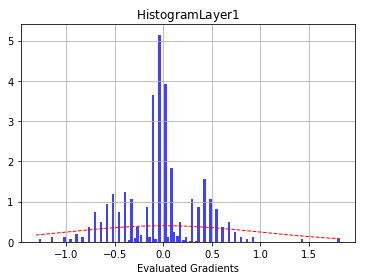

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


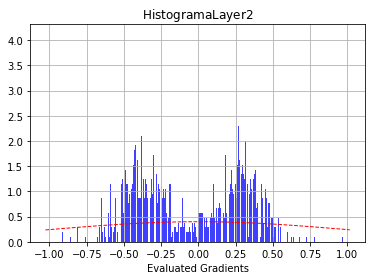

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


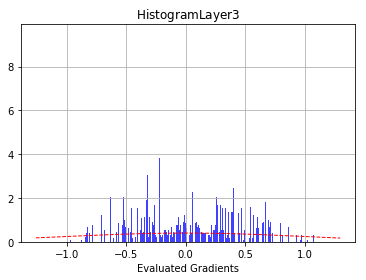

<Figure size 432x288 with 0 Axes>

In [13]:
loss = keras.losses.mean_squared_error(modelc.output,y_train_scaled)
gradients = K.gradients(loss, modelc.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modelc.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modelc.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histograma Layer 2}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


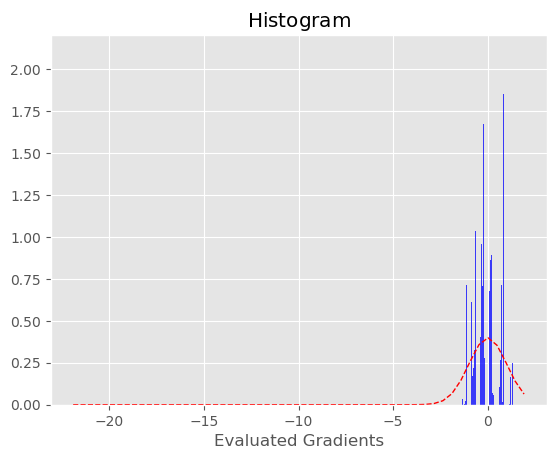

<Figure size 640x480 with 0 Axes>

In [18]:
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.4, 0.4, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

### d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.


/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


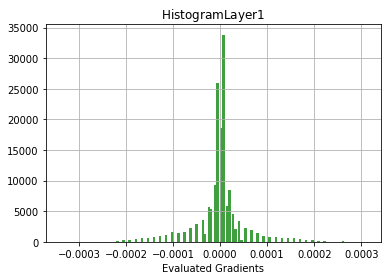

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


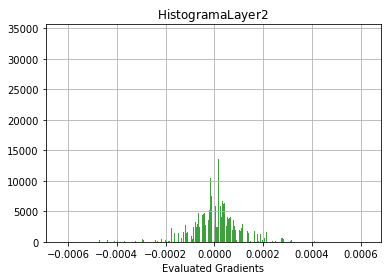

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


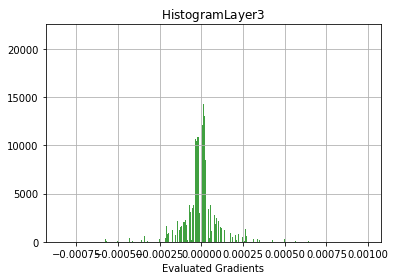

<Figure size 432x288 with 0 Axes>

In [9]:
modeldo = Sequential()
modeldo.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modeldo.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(modeldo.output,y_train_scaled)
gradients = K.gradients(loss, modeldo.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modeldo.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modeldo.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modeldo.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modeldo.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modeldo.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histograma Layer 2}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()

In [14]:
modeld = Sequential()
modeld.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modeld.compile(optimizer=sgd,loss='mean_squared_error')
historyd = modeld.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resultd= pd.DataFrame(historyd.history)
resultd.to_csv("history2d.csv")

loss = keras.losses.mean_squared_error(modeld.output,y_train_scaled)
listOfVariableTensors = modeld.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientsd = sess.run(gradients,feed_dict={modeld.input:X_train_scaled.values})
evaluated_gradientsd = [gradient/len(y_train) for gradient in evaluated_gradientsd]


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 7s 744us/step - loss: 14.9780 - val_loss: 13.7604
Epoch 2/250
9745/9745 [==============================] - 7s 708us/step - loss: 5.8098 - val_loss: 1.3102
Epoch 3/250
9745/9745 [==============================] - 9s 913us/step - loss: 2.0363 - val_loss: 2.1392
Epoch 4/250
9745/9745 [==============================] - 7s 768us/step - loss: 1.3551 - val_loss: 0.6529
Epoch 5/250
9745/9745 [==============================] - 7s 716us/step - loss: 1.1175 - val_loss: 1.0043
Epoch 6/250
9745/9745 [==============================] - 5s 525us/step - loss: 0.8771 - val_loss: 0.5150
Epoch 7/250
9745/9745 [==============================] - 7s 672us/step - loss: 0.7375 - val_loss: 3.0925
Epoch 8/250
9745/9745 [==============================] - 5s 551us/step - loss: 0.5960 - val_loss: 2.7960
Epoch 9/250
9745/9745 [==============================] - 7s 713us/step - loss: 0.6064 - val_loss: 1.1890
Epoch

Epoch 78/250
9745/9745 [==============================] - 6s 629us/step - loss: 0.0630 - val_loss: 0.6265
Epoch 79/250
9745/9745 [==============================] - 7s 691us/step - loss: 0.0490 - val_loss: 0.6145
Epoch 80/250
9745/9745 [==============================] - 8s 810us/step - loss: 0.0664 - val_loss: 0.5448
Epoch 81/250
9745/9745 [==============================] - 7s 727us/step - loss: 0.0582 - val_loss: 0.3982
Epoch 82/250
9745/9745 [==============================] - 7s 740us/step - loss: 0.0506 - val_loss: 0.4236
Epoch 83/250
9745/9745 [==============================] - 7s 716us/step - loss: 0.0475 - val_loss: 0.8537
Epoch 84/250
9745/9745 [==============================] - 7s 753us/step - loss: 0.0497 - val_loss: 0.5206
Epoch 85/250
9745/9745 [==============================] - 6s 629us/step - loss: 0.0485 - val_loss: 0.3323
Epoch 86/250
9745/9745 [==============================] - 6s 657us/step - loss: 0.0537 - val_loss: 0.4213
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 5s 558us/step - loss: 0.0346 - val_loss: 0.4793
Epoch 156/250
9745/9745 [==============================] - 7s 676us/step - loss: 0.0287 - val_loss: 0.5883
Epoch 157/250
9745/9745 [==============================] - 6s 612us/step - loss: 0.0292 - val_loss: 0.5723
Epoch 158/250
9745/9745 [==============================] - 7s 699us/step - loss: 0.0290 - val_loss: 0.7037
Epoch 159/250
9745/9745 [==============================] - 6s 611us/step - loss: 0.0310 - val_loss: 0.6623
Epoch 160/250
9745/9745 [==============================] - 5s 482us/step - loss: 0.0292 - val_loss: 0.4580
Epoch 161/250
9745/9745 [==============================] - 5s 514us/step - loss: 0.0287 - val_loss: 0.4770
Epoch 162/250
9745/9745 [==============================] - 6s 606us/step - loss: 0.0287 - val_loss: 0.4513
Epoch 163/250
9745/9745 [==============================] - 6s 654us/step - loss: 0.0313 - val_loss: 0.6552
Epoch 164/250
9745/9745 [============

9745/9745 [==============================] - 15s 1ms/step - loss: 0.0244 - val_loss: 0.5931
Epoch 233/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0250 - val_loss: 0.7385
Epoch 234/250
9745/9745 [==============================] - 14s 1ms/step - loss: 0.0218 - val_loss: 0.8062
Epoch 235/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0255 - val_loss: 0.6727
Epoch 236/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0219 - val_loss: 0.6270
Epoch 237/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0207 - val_loss: 0.6008
Epoch 238/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.0236 - val_loss: 0.9516
Epoch 239/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0246 - val_loss: 0.6425
Epoch 240/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0222 - val_loss: 0.5369
Epoch 241/250
9745/9745 [==============================] - 1

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


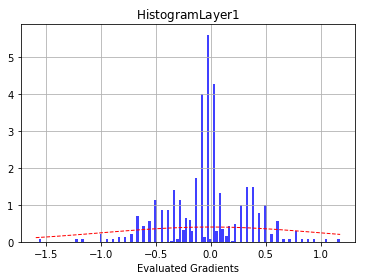

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


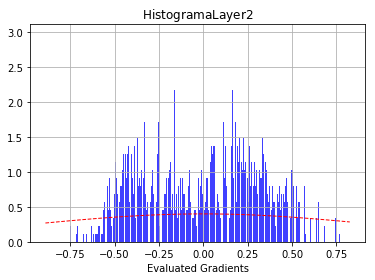

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


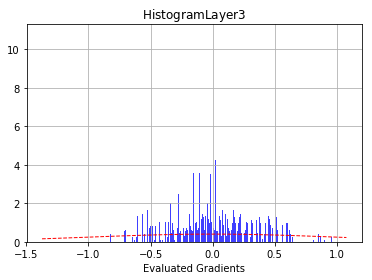

<Figure size 432x288 with 0 Axes>

In [15]:
loss = keras.losses.mean_squared_error(modeld.output,y_train_scaled)
gradients = K.gradients(loss, modeld.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modeld.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modeld.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modeld.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modeld.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modeld.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histograma Layer 2}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


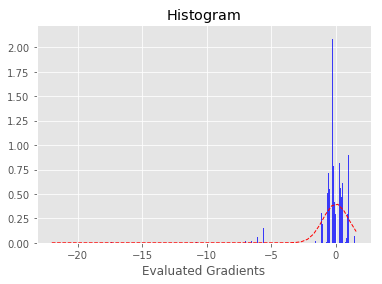

<Figure size 432x288 with 0 Axes>

In [139]:
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientsd, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

###  e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.


### Usando una inicialización uniform:
```python
    model.add(Dense(nh, kernel_initializer='uniform',activation='relu')) #uniform
```

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


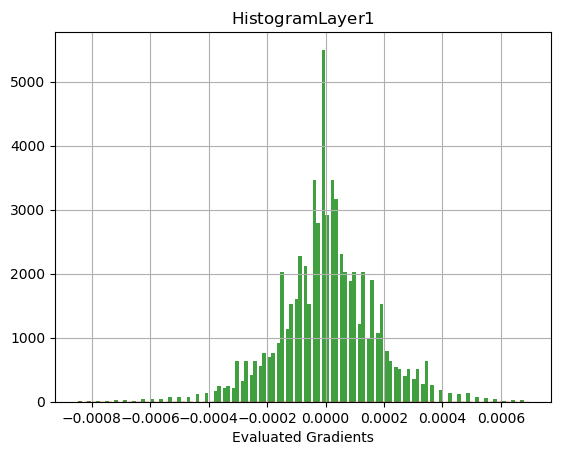

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


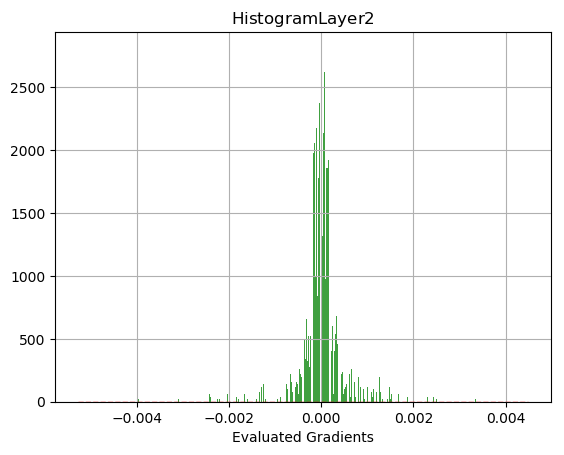

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


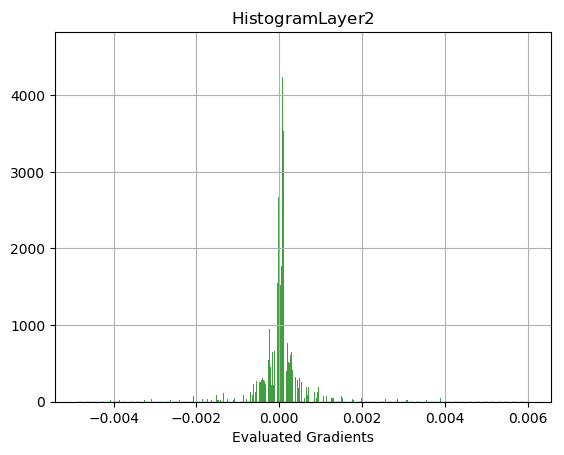

<Figure size 640x480 with 0 Axes>

In [32]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu')) #uniform
model.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd,loss='mean_squared_error')
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
#We can now calculate the gradients.
gradients = K.gradients(loss, model.layers[0].trainable_weights)
gradients2 = K.gradients(loss, model.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, model.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
sess2 = K.get_session()
evaluated_gradientss2 = sess2.run(gradients2,feed_dict={model.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess2.run(gradients3,feed_dict={model.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

In [18]:
modele = Sequential()
modele.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu')) #uniform
modele.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.001)
modele.compile(optimizer=sgd,loss='mean_squared_error')
historye = modele.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2e(uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 785us/step - loss: 31.7411 - val_loss: 3.0047
Epoch 2/250
9745/9745 [==============================] - 6s 620us/step - loss: 1.5224 - val_loss: 2.0383
Epoch 3/250
9745/9745 [==============================] - 6s 634us/step - loss: 0.6225 - val_loss: 1.4038
Epoch 4/250
9745/9745 [==============================] - 6s 663us/step - loss: 0.4384 - val_loss: 1.5184
Epoch 5/250
9745/9745 [==============================] - 7s 693us/step - loss: 0.3118 - val_loss: 1.3723
Epoch 6/250
9745/9745 [==============================] - 6s 640us/step - loss: 0.2708 - val_loss: 1.3700
Epoch 7/250
9745/9745 [==============================] - 6s 639us/step - loss: 0.2420 - val_loss: 1.0880
Epoch 8/250
9745/9745 [==============================] - 6s 661us/step - loss: 0.2209 - val_loss: 1.3417
Epoch 9/250
9745/9745 [==============================] - 6s 652us/step - loss: 0.1962 - val_loss: 1.0831
Epoch 

Epoch 78/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0382 - val_loss: 0.6512
Epoch 79/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.0382 - val_loss: 0.7729
Epoch 80/250
9745/9745 [==============================] - 17s 2ms/step - loss: 0.0381 - val_loss: 0.6835
Epoch 81/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.0375 - val_loss: 0.7315
Epoch 82/250
9745/9745 [==============================] - 15s 2ms/step - loss: 0.0371 - val_loss: 0.6637
Epoch 83/250
9745/9745 [==============================] - 17s 2ms/step - loss: 0.0374 - val_loss: 0.9150
Epoch 84/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.0390 - val_loss: 0.7000
Epoch 85/250
9745/9745 [==============================] - 24s 2ms/step - loss: 0.0342 - val_loss: 0.6609
Epoch 86/250
9745/9745 [==============================] - 23s 2ms/step - loss: 0.0356 - val_loss: 0.5645
Epoch 87/250
9745/9745 [==============================]

9745/9745 [==============================] - 20s 2ms/step - loss: 0.0203 - val_loss: 0.7136
Epoch 233/250
9745/9745 [==============================] - 19s 2ms/step - loss: 0.0175 - val_loss: 0.6304
Epoch 234/250
9745/9745 [==============================] - 20s 2ms/step - loss: 0.0197 - val_loss: 0.6706
Epoch 235/250
9745/9745 [==============================] - 20s 2ms/step - loss: 0.0175 - val_loss: 0.6292
Epoch 236/250
9745/9745 [==============================] - 20s 2ms/step - loss: 0.0176 - val_loss: 0.6037
Epoch 237/250
9745/9745 [==============================] - 20s 2ms/step - loss: 0.0168 - val_loss: 0.6703
Epoch 238/250
9745/9745 [==============================] - 22s 2ms/step - loss: 0.0177 - val_loss: 0.6061
Epoch 239/250
9745/9745 [==============================] - 22s 2ms/step - loss: 0.0193 - val_loss: 0.7220
Epoch 240/250
9745/9745 [==============================] - 22s 2ms/step - loss: 0.0160 - val_loss: 0.6596
Epoch 241/250
9745/9745 [==============================] - 2

NameError: name 'historyd' is not defined

In [34]:
loss = keras.losses.mean_squared_error(modele.output,y_train_scaled)
listOfVariableTensors = modele.trainable_weights 
#We can now calculate the gradients.
gradients = K.gradients(loss, modele.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modele.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modele.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modele.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
sess2 = K.get_session()
evaluated_gradientss2 = sess2.run(gradients2,feed_dict={modele.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess2.run(gradients3,feed_dict={modele.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


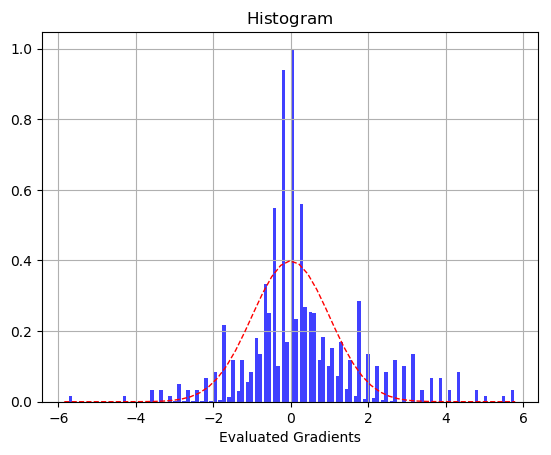

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


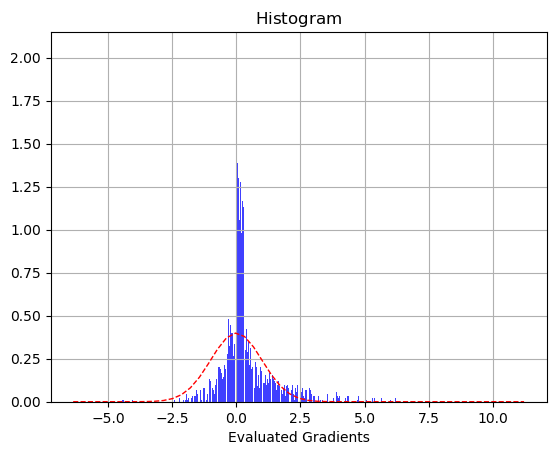

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


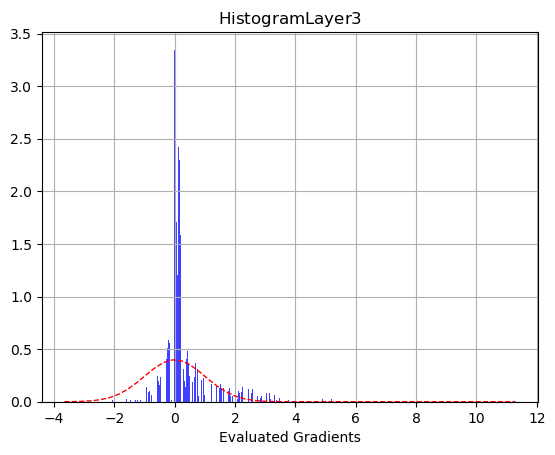

<Figure size 640x480 with 0 Axes>

In [35]:
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

### Usando una inicialización uniform 
```python
    model.add(Dense(nh, kernel_initializer='he_uniform',activation='relu')) #he
```

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


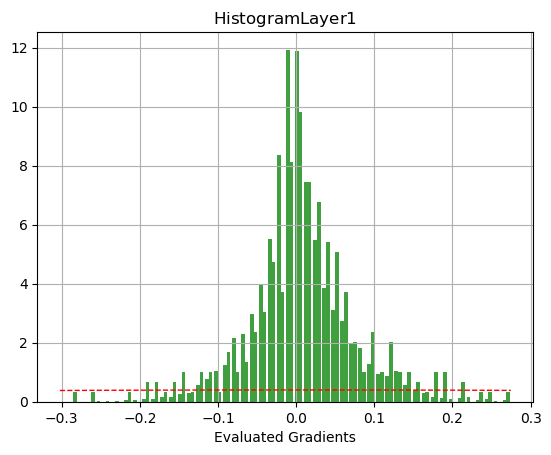

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


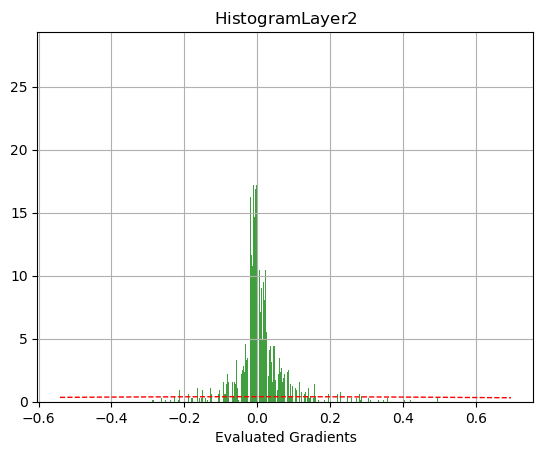

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


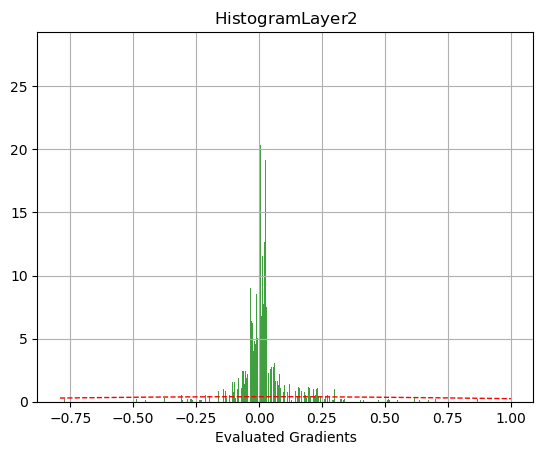

<Figure size 640x480 with 0 Axes>

In [43]:
modelh = Sequential()
modelh.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
modelh.add(Dense(256, kernel_initializer='he_uniform',activation='relu')) #uniform
modelh.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
modelh.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelh.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelh.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00008)
modelh.compile(optimizer=sgd,loss='mean_squared_error')
loss = keras.losses.mean_squared_error(modelh.output,y_train_scaled)
listOfVariableTensors = modelh.trainable_weights 
#We can now calculate the gradients.
gradients = K.gradients(loss, modelh.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modelh.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modelh.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelh.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modelh.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modelh.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

In [36]:
modelhe = Sequential()
modelhe.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu')) #uniform
modelhe.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00008)
modelhe.compile(optimizer=sgd,loss='mean_squared_error')
historye = modelhe.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2he(he-uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 822us/step - loss: 13.7550 - val_loss: 5.3228
Epoch 2/250
9745/9745 [==============================] - 6s 578us/step - loss: 1.4600 - val_loss: 4.4495
Epoch 3/250
9745/9745 [==============================] - 6s 603us/step - loss: 0.8022 - val_loss: 3.8511
Epoch 4/250
9745/9745 [==============================] - 6s 589us/step - loss: 0.5816 - val_loss: 3.2867
Epoch 5/250
9745/9745 [==============================] - 5s 554us/step - loss: 0.4686 - val_loss: 3.2610
Epoch 6/250
9745/9745 [==============================] - 6s 610us/step - loss: 0.3958 - val_loss: 3.1165
Epoch 7/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.3528 - val_loss: 3.1474
Epoch 8/250
9745/9745 [==============================] - 6s 610us/step - loss: 0.3131 - val_loss: 3.1072
Epoch 9/250
9745/9745 [==============================] - 6s 573us/step - loss: 0.2864 - val_loss: 2.9475
Epoch 

9745/9745 [==============================] - 13s 1ms/step - loss: 0.0562 - val_loss: 2.1120
Epoch 79/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0550 - val_loss: 2.1855
Epoch 80/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0536 - val_loss: 2.1806
Epoch 81/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0535 - val_loss: 2.1565
Epoch 82/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0530 - val_loss: 2.5620
Epoch 83/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0557 - val_loss: 2.1537
Epoch 84/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0540 - val_loss: 2.1121
Epoch 85/250
9745/9745 [==============================] - 13s 1ms/step - loss: 0.0524 - val_loss: 2.1173
Epoch 86/250
9745/9745 [==============================] - 18s 2ms/step - loss: 0.0512 - val_loss: 2.0814
Epoch 87/250
9745/9745 [==============================] - 12s 1ms/st

9745/9745 [==============================] - 20s 2ms/step - loss: 0.0244 - val_loss: 1.9637
Epoch 233/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0245 - val_loss: 1.9307
Epoch 234/250
9745/9745 [==============================] - 6s 617us/step - loss: 0.0243 - val_loss: 1.9654
Epoch 235/250
9745/9745 [==============================] - 6s 636us/step - loss: 0.0236 - val_loss: 1.9573
Epoch 236/250
9745/9745 [==============================] - 6s 631us/step - loss: 0.0238 - val_loss: 1.9223
Epoch 237/250
9745/9745 [==============================] - 6s 646us/step - loss: 0.0238 - val_loss: 2.0040
Epoch 238/250
9745/9745 [==============================] - 6s 657us/step - loss: 0.0239 - val_loss: 1.9936
Epoch 239/250
9745/9745 [==============================] - 6s 652us/step - loss: 0.0237 - val_loss: 2.0648
Epoch 240/250
9745/9745 [==============================] - 6s 645us/step - loss: 0.0235 - val_loss: 1.9625
Epoch 241/250
9745/9745 [============================

NameError: name 'historyd' is not defined

In [37]:
loss = keras.losses.mean_squared_error(modelhe.output,y_train_scaled)
listOfVariableTensors = modelhe.trainable_weights 
#We can now calculate the gradients.
gradients = K.gradients(loss, modelhe.layers[0].trainable_weights)
gradients2 = K.gradients(loss, modelhe.layers[1].trainable_weights)[0]
gradients3 = K.gradients(loss, modelhe.layers[2].trainable_weights)[0]
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelhe.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]
evaluated_gradientss2 = sess.run(gradients2,feed_dict={modelhe.input:X_train_scaled.values})
evaluated_gradientss2 = [gradient/len(y_train) for gradient in evaluated_gradientss2]
evaluated_gradientss3 = sess.run(gradients3,feed_dict={modelhe.input:X_train_scaled.values})
evaluated_gradientss3 = [gradient/len(y_train) for gradient in evaluated_gradientss3]

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


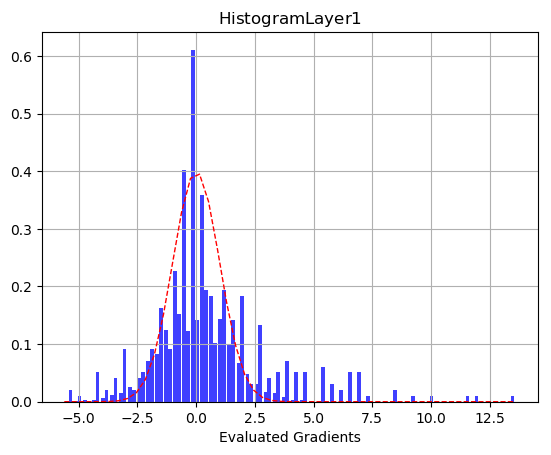

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


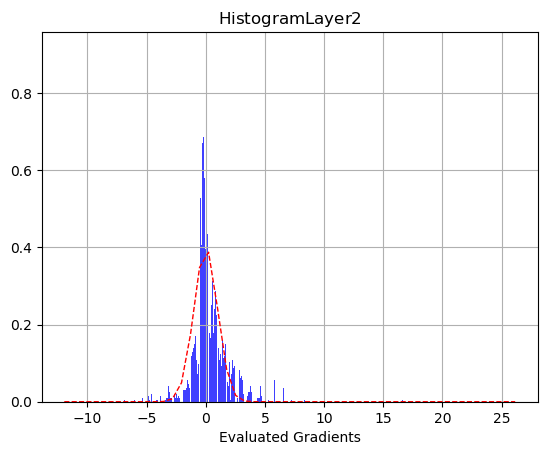

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


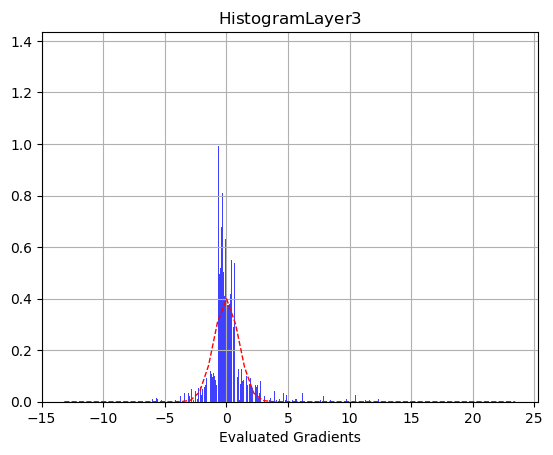

<Figure size 640x480 with 0 Axes>

In [39]:
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 1}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 2}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()
n, bins, patches = plt.hist(evaluated_gradientss3, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram Layer 3}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

### f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.**

In [63]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
historyf = modelf.fit(X_train_scaled,
                      y_train, epochs=250,
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val))

resultf= pd.DataFrame(historyf.history)
resultf.to_csv("history2f.csv")
numEpochs = 250


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 18s 2ms/step - loss: 10.1803 - val_loss: 2.0508
Epoch 2/250
9745/9745 [==============================] - 15s 2ms/step - loss: 2.5345 - val_loss: 1.5179
Epoch 3/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.4274 - val_loss: 5.7192
Epoch 4/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.0272 - val_loss: 0.7788
Epoch 5/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.8274 - val_loss: 0.9646
Epoch 6/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.6861 - val_loss: 0.8756
Epoch 7/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.5210 - val_loss: 1.1036
Epoch 8/250
9745/9745 [==============================] - 15s 2ms/step - loss: 0.4704 - val_loss: 2.7827
Epoch 9/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.4209 - val_loss: 1.7655
Epoch 10/250
97

9745/9745 [==============================] - 6s 597us/step - loss: 0.0317 - val_loss: 0.3936
Epoch 156/250
9745/9745 [==============================] - 7s 704us/step - loss: 0.0253 - val_loss: 0.6136
Epoch 157/250
9745/9745 [==============================] - 6s 638us/step - loss: 0.0295 - val_loss: 0.5685
Epoch 158/250
9745/9745 [==============================] - 7s 722us/step - loss: 0.0270 - val_loss: 0.4987
Epoch 159/250
9745/9745 [==============================] - 7s 669us/step - loss: 0.0291 - val_loss: 0.6013
Epoch 160/250
9745/9745 [==============================] - 8s 788us/step - loss: 0.0288 - val_loss: 0.4700
Epoch 161/250
9745/9745 [==============================] - 6s 648us/step - loss: 0.0283 - val_loss: 0.4105
Epoch 162/250
9745/9745 [==============================] - 6s 667us/step - loss: 0.0267 - val_loss: 0.7365
Epoch 163/250
9745/9745 [==============================] - 6s 601us/step - loss: 0.0274 - val_loss: 0.6919
Epoch 164/250
9745/9745 [==========================

NameError: name 'historyd' is not defined

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


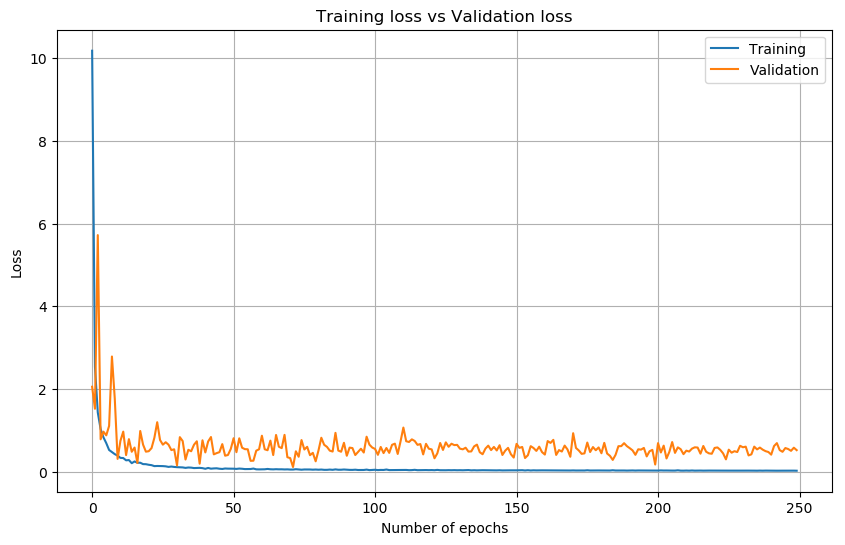

In [12]:
plt.rcParams.update(plt.rcParamsDefault)
history1b = pd.read_csv("history2f.csv")
train_loss = history1b['loss']
val_loss = history1b['val_loss']
plotArrays(train_loss, val_loss, 250, 'Number of epochs', 'Loss', 'Training loss vs Validation loss')

###  **g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**'**y que es continua derivable (**softplus**)**¿Cuál es el beneficio de ésta con respecto ReLU? Comente.**

Las dos funciones de activación son muy similares, excepto que Softplus es diferenciable es cero. Por otra parte, RElu hace más fáciles los cálculos y su derivada, por lo que los algoritmos forward pass y backward pass son más rápidos. Con la función de activación Relu se favorecen las representaciones distribuidas, por su arquitectura no es derivable en cero, la derivada no es continua. La dura saturación de Relu en el umbral podría bloquear el gradiente en la capa de salida, al tener ceros reales, ya que no pueden recuperarse de esto. Sin embargo, no sucede tan frecuentemente que la suma ponderada sea cero, para esto se puede normalizar la data entre 0 y 1. En casos donde no se tengan estas garantías es mejor usar la versión diferenciable Softplus, que además hace el entrenamiento es más sencillo.


In [22]:
modelg = Sequential()
modelg.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus')) #uniform
modelg.add(Dense(256,  kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00001)
modelg.compile(optimizer=sgd,loss='mean_squared_error')
historyg = modelg.fit(X_train_scaled, y_train, epochs=250, 
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[TestCallback((X_test_scaled.values, yTest))])
resultf= pd.DataFrame(historyg.history)
resultf.to_csv("history2g.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 27s 3ms/step - loss: 16.5792 - val_loss: 9.2668

Testing loss: 6.766631512452111
Epoch 2/250
9745/9745 [==============================] - 22s 2ms/step - loss: 6.2176 - val_loss: 6.8468

Testing loss: 5.377598052930773
Epoch 3/250
9745/9745 [==============================] - 22s 2ms/step - loss: 4.6650 - val_loss: 6.1288

Testing loss: 4.449204293440051
Epoch 4/250
9745/9745 [==============================] - 19s 2ms/step - loss: 3.8936 - val_loss: 5.3565

Testing loss: 3.9397673159776576
Epoch 5/250
9745/9745 [==============================] - 20s 2ms/step - loss: 3.3613 - val_loss: 4.6958

Testing loss: 3.626800119069741
Epoch 6/250
9745/9745 [==============================] - 20s 2ms/step - loss: 2.9234 - val_loss: 4.1695

Testing loss: 3.327176610808124
Epoch 7/250
9745/9745 [==============================] - 20s 2ms/step - loss: 2.5867 - val_loss: 3.7859

Testing loss: 3.0028913

9745/9745 [==============================] - 12s 1ms/step - loss: 0.3679 - val_loss: 1.3837

Testing loss: 0.9649376301282148
Epoch 61/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.3641 - val_loss: 1.3577

Testing loss: 0.9617611385536429
Epoch 62/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.3611 - val_loss: 1.3808

Testing loss: 0.9372769254957206
Epoch 63/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.3580 - val_loss: 1.4336

Testing loss: 0.8910955168646185
Epoch 64/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.3546 - val_loss: 1.3961

Testing loss: 0.9231503826211014
Epoch 65/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.3512 - val_loss: 1.3949

Testing loss: 0.9060634450928129
Epoch 66/250
9745/9745 [==============================] - 14s 1ms/step - loss: 0.3484 - val_loss: 1.3873

Testing loss: 0.9136056246012021
Epoch 67/250
9745/9745 [================

9745/9745 [==============================] - 11s 1ms/step - loss: 0.2490 - val_loss: 1.2695

Testing loss: 0.8140365980079441
Epoch 120/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.2475 - val_loss: 1.2461

Testing loss: 0.8277273557202758
Epoch 121/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.2466 - val_loss: 1.3103

Testing loss: 0.7703994971883067
Epoch 122/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.2451 - val_loss: 1.2125

Testing loss: 0.859106323588907
Epoch 123/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.2444 - val_loss: 1.2380

Testing loss: 0.8263227176998892
Epoch 124/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.2430 - val_loss: 1.3486

Testing loss: 0.7434863026972721
Epoch 125/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.2420 - val_loss: 1.2963

Testing loss: 0.7681090891679193
Epoch 126/250
9745/9745 [==========


Testing loss: 0.7841723333336459
Epoch 178/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.1961 - val_loss: 1.2416

Testing loss: 0.7134342714074111
Epoch 179/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.1954 - val_loss: 1.2523

Testing loss: 0.7005947404065287
Epoch 180/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.1946 - val_loss: 1.1937

Testing loss: 0.7547779376994991
Epoch 181/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.1941 - val_loss: 1.1753

Testing loss: 0.7610961481543609
Epoch 182/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.1933 - val_loss: 1.2164

Testing loss: 0.7258462936945709
Epoch 183/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.1927 - val_loss: 1.2263

Testing loss: 0.7114038286905676
Epoch 184/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.1920 - val_loss: 1.2384

Testing loss: 0.702

NameError: name 'historyf' is not defined

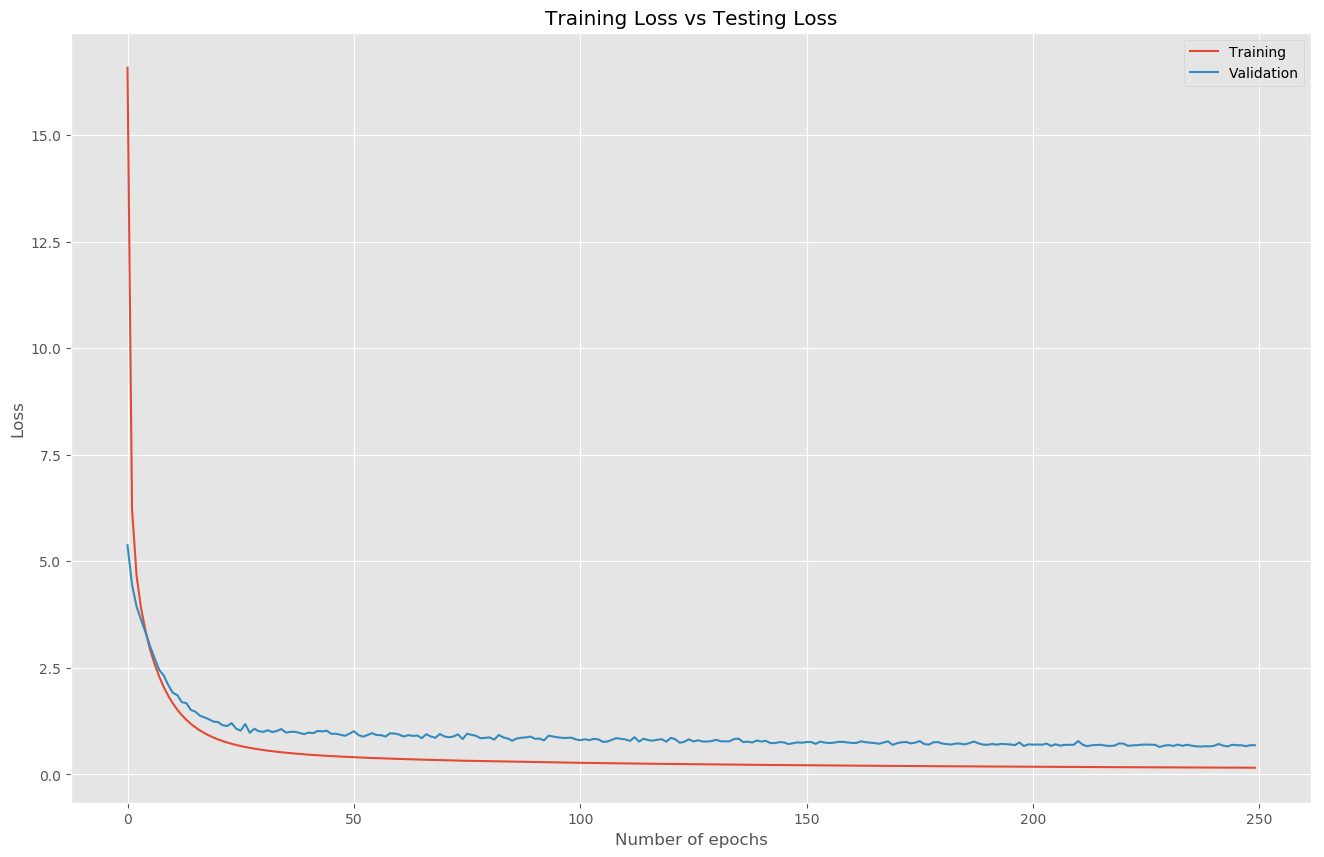

In [25]:
test_loss[-1] = modelg.evaluate(X_test_scaled.values, yTest, verbose=0)
traing_loss=historyg.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,traing_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

### h) Pruebe con utilizar una red shallow (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?**

El teorema de aproximación universal expone en forma resumida que una red feedforward con una sola capa oculta puede representar una aproximación de cualquier funión continua. Pero debe ser una función no constante, limitada y acotada.
En las capas ocultas la función de activación usada es logística, que es una función acotada, no constante y limitada. 

In [5]:
modelh = Sequential()
modelh.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='sigmoid'))
modelh.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.001)
modelh.compile(optimizer=sgd,loss='mean_squared_error')
historyh = modelh.fit(X_train_scaled.values,
                     y_train_scaled, epochs=250, 
                     verbose=1, 
                     validation_data=(X_val_scaled.values, y_val_scaled),
                     callbacks=[TestCallback((X_test_scaled.values, yTest))])
result = pd.DataFrame(historyh.history)
result.to_csv("historyh.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 9s 873us/step - loss: 0.1396 - val_loss: 0.0855

Testing loss: 116.02743065684948
Epoch 2/250
9745/9745 [==============================] - 9s 912us/step - loss: 0.0782 - val_loss: 0.0666

Testing loss: 115.96181457669802
Epoch 3/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.0653 - val_loss: 0.0580

Testing loss: 116.5074717600325
Epoch 4/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.0586 - val_loss: 0.0544

Testing loss: 116.80007417386899
Epoch 5/250
9745/9745 [==============================] - 9s 873us/step - loss: 0.0548 - val_loss: 0.0508

Testing loss: 116.28109502029263
Epoch 6/250
9745/9745 [==============================] - 9s 892us/step - loss: 0.0518 - val_loss: 0.0494

Testing loss: 115.91535795052911
Epoch 7/250
9745/9745 [==============================] - 8s 823us/step - loss: 0.0493 - val_loss: 0.0467

Testing loss: 1


Testing loss: 116.04473537590644
Epoch 118/250
9745/9745 [==============================] - 8s 777us/step - loss: 0.0148 - val_loss: 0.0209

Testing loss: 116.05176478758864
Epoch 119/250
9745/9745 [==============================] - 8s 849us/step - loss: 0.0147 - val_loss: 0.0212

Testing loss: 115.66681538089945
Epoch 120/250
9745/9745 [==============================] - 8s 773us/step - loss: 0.0145 - val_loss: 0.0189

Testing loss: 116.33441959799045
Epoch 121/250
9745/9745 [==============================] - 7s 744us/step - loss: 0.0145 - val_loss: 0.0202

Testing loss: 116.48450705082533
Epoch 122/250
9745/9745 [==============================] - 6s 632us/step - loss: 0.0143 - val_loss: 0.0215

Testing loss: 115.97523331358435
Epoch 123/250
9745/9745 [==============================] - 8s 816us/step - loss: 0.0143 - val_loss: 0.0208

Testing loss: 116.19982159426333
Epoch 124/250
9745/9745 [==============================] - 8s 850us/step - loss: 0.0141 - val_loss: 0.0205

Testing loss

9745/9745 [==============================] - 7s 714us/step - loss: 0.0102 - val_loss: 0.0189

Testing loss: 116.21579291304947
Epoch 177/250
9745/9745 [==============================] - 8s 777us/step - loss: 0.0101 - val_loss: 0.0178

Testing loss: 116.275148131097
Epoch 178/250
9745/9745 [==============================] - 7s 748us/step - loss: 0.0101 - val_loss: 0.0192

Testing loss: 116.32146468571477
Epoch 179/250
9745/9745 [==============================] - 7s 687us/step - loss: 0.0100 - val_loss: 0.0178

Testing loss: 116.46868312305048
Epoch 180/250
9745/9745 [==============================] - 8s 805us/step - loss: 0.0099 - val_loss: 0.0195

Testing loss: 116.25370135520588
Epoch 181/250
9745/9745 [==============================] - 9s 888us/step - loss: 0.0099 - val_loss: 0.0198

Testing loss: 115.84665087299558
Epoch 182/250
9745/9745 [==============================] - 8s 787us/step - loss: 0.0098 - val_loss: 0.0192

Testing loss: 116.13088180297801
Epoch 183/250
9745/9745 [====

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


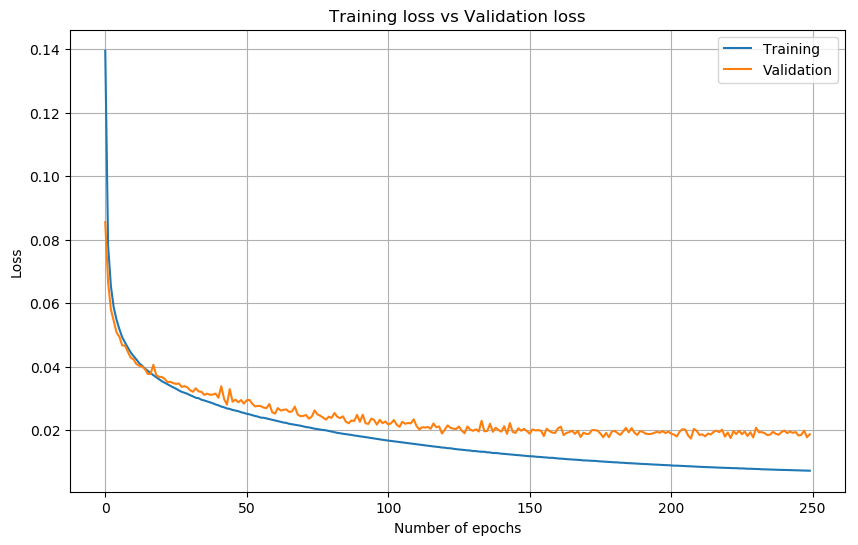

In [13]:
plt.rcParams.update(plt.rcParamsDefault)
history1b = pd.read_csv("historyh.csv")
train_loss = history1b['loss']
val_loss = history1b['val_loss']
plotArrays(train_loss, val_loss, 250, 'Number of epochs', 'Loss', 'Training loss vs Validation loss')